Young's Modulus is: 72247.30786412091 MPa
Intercept: 149.1849926425779 MPa


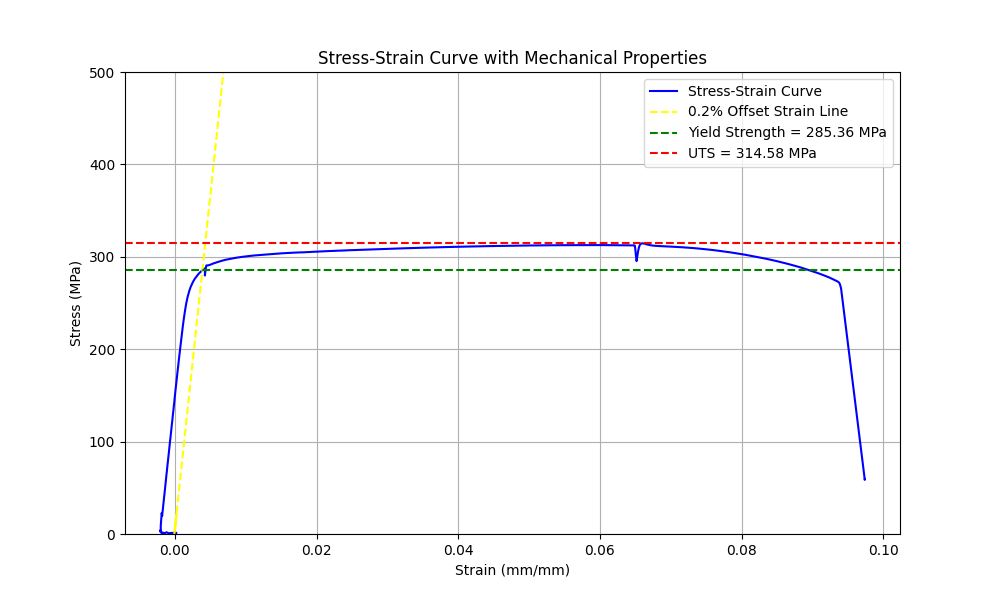

Young's Modulus (E): 72.25 GPa
Ultimate Tensile Strength (UTS): 314.58 MPa
Yield Strength: 285.36 MPa


In [33]:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    %matplotlib widget
    # Constants
    Thickness=2.544 # mm
    Width=10.14  # mm
    area = Thickness * Width  # Calculate the area of the specimen
    
    # Load tensile test data
    df = pd.read_csv('C-3DKA-5.csv', header=[0])
    
    #df.columns = [f"{col[0]} {col[1]}" for col in df.columns]
    
    # Extract relevant columns
    #time = df["Time (sec)"]
    #displacement = df["Crosshead separation (mm)"]
    force = df[df.columns[1]]
    elongation = df[df.columns[2]]
    strain = elongation # Strain in mm/mm
    
    # Calculate stress and strain
    force = force * 1000 # Convert kN to N
    stress = (force / area)  # N/m^2 or Pa
    uts = stress.max()
    
    #find the data before uts
    idx_peak = np.argmax(stress)
    strain_up = strain[:idx_peak+1]
    stress_up = stress[:idx_peak+1]
    
    #Boundary for 20% - 50% of UTS
    lower_bound = 0.1 * uts
    upper_bound = 0.3 * uts
    
    elastic_reg = (lower_bound <= stress_up) & (stress_up <= upper_bound)
    
    stress_ela = stress_up[elastic_reg]
    strain_ela = strain_up[elastic_reg] 
    
    E, intercept = np.polyfit(strain_ela, stress_ela, 1)
    print(f"Young's Modulus is: {E} MPa",)
    E_GPa = E / 1000  # Convert MPa to GPa
    print(f"Intercept: {intercept} MPa")
   
    # Select over 30% of UTS, as yield stress will over 30% uts
    strain_new = elongation
    stress_new = force / area
    mask = (lower_bound <= stress)
    strain_mask = strain_new[mask]
    stress_mask = stress_new[mask]
    
    offset_decimal = 0.002  # 0.2% in decimal
    offset_line = E * (strain_new - offset_decimal) + intercept

    #Find the Yield strength
    diff = stress_mask - offset_line
    cross_index = np.where(diff <= 0)[0][0] 
    x1 = strain_mask[cross_index-1]
    x2 = strain_mask[cross_index]
    y1 = diff[cross_index-1]
    y2 = diff[cross_index]
    yield_strain = x1 - y1 * (x2 - x1) / (y2 - y1)
    yield_strength = np.interp(yield_strain, strain_new, stress_new)

    #Plot
    fig, ax = plt.subplots(figsize=(10,6))
    ax.plot(strain, stress, label='Stress-Strain Curve', color='blue')
    ax.plot(strain_new, offset_line, label='0.2% Offset Strain Line', color='yellow',linestyle = '--')
    ax.axhline(y=yield_strength, label=f'Yield Strength = {yield_strength:.2f} MPa', color='green', linestyle = '--')
    ax.axhline(y=uts, color='red', linestyle = '--', label=f'UTS = {uts:.2f} MPa')
    
    ax.set_xlabel('Strain (mm/mm)')
    ax.set_ylabel('Stress (MPa)')
    ax.set_title('Stress-Strain Curve with Mechanical Properties')
    ax.legend()
    ax.grid(True)
    ax.set_ylim(0, 500)
    plt.show()
    # Print results
    print(f"Young's Modulus (E): {E_GPa:.2f} GPa")
    print(f"Ultimate Tensile Strength (UTS): {uts:.2f} MPa")
    print(f"Yield Strength: {yield_strength:.2f} MPa")
    

In [20]:
    # Select over 30% of UTS, as yield stress will over 30% uts
    strain_new = elongation
    stress_new = force / area
    mask = (elastic_low <= stress)
    strain_mask = strain_new[mask]
    stress_mask = stress_new[mask]
    
    offset_decimal = 0.002  # 0.2% in decimal
    offset_line = E * (strain_new - offset_decimal) + intercept

In [21]:
    #Find the Yield strength
    diff = stress_mask - offset_line
    cross_index = np.where(diff <= 0)[0][0] 
    x1 = strain_mask[cross_index-1]
    x2 = strain_mask[cross_index]
    y1 = diff[cross_index-1]
    y2 = diff[cross_index]
    yield_strain = x1 - y1 * (x2 - x1) / (y2 - y1)
    yield_strength = np.interp(yield_strain, strain, stress)
   

In [22]:
yield_strain

np.float64(0.003884801734201361)

In [23]:
yield_strength

np.float64(285.3568437962527)

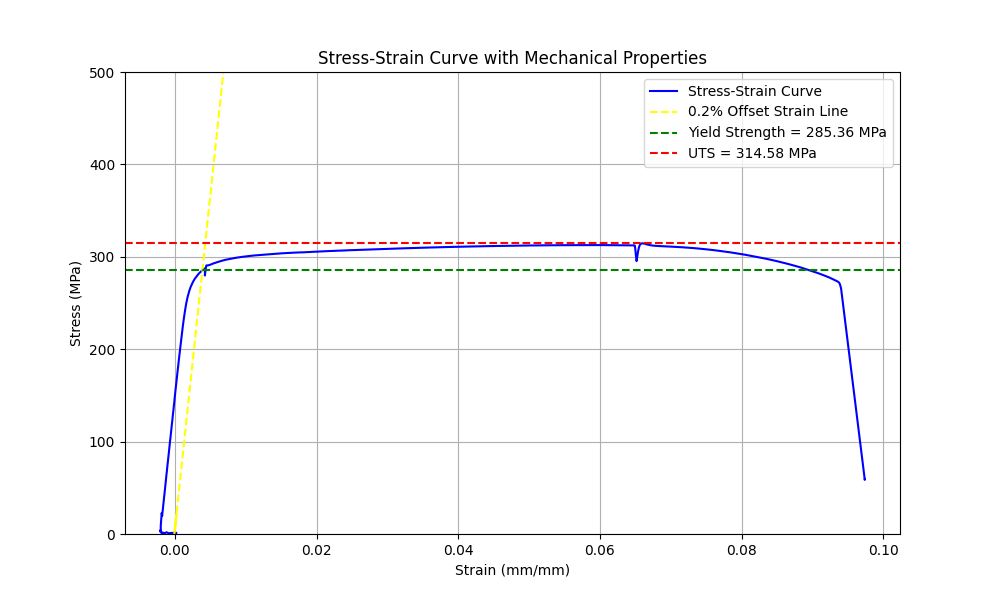

Young's Modulus (E): 72.25 GPa
Ultimate Tensile Strength (UTS): 314.58 MPa
Yield Strength: 285.36 MPa


In [24]:
    #Plot
    fig, ax = plt.subplots(figsize=(10,6))
    ax.plot(strain, stress, label='Stress-Strain Curve', color='blue')
    ax.plot(strain_new, offset_line, label='0.2% Offset Strain Line', color='yellow',linestyle = '--')
    ax.axhline(y=yield_strength, label=f'Yield Strength = {yield_strength:.2f} MPa', color='green', linestyle = '--')
    ax.axhline(y=uts, color='red', linestyle = '--', label=f'UTS = {uts:.2f} MPa')
    
    ax.set_xlabel('Strain (mm/mm)')
    ax.set_ylabel('Stress (MPa)')
    ax.set_title('Stress-Strain Curve with Mechanical Properties')
    ax.legend()
    ax.grid(True)
    ax.set_ylim(0, 500)
    plt.show()
    # Print results
    print(f"Young's Modulus (E): {E_GPa:.2f} GPa")
    print(f"Ultimate Tensile Strength (UTS): {uts:.2f} MPa")
    print(f"Yield Strength: {yield_strength:.2f} MPa")
    